# Set environment

In [1]:
### load library
suppressWarnings(suppressMessages(library("tidyverse")))
suppressWarnings(suppressMessages(library("MPSK")))
suppressWarnings(suppressMessages(library("mvtnorm")))

cat("Goal: run MPSK on small multivariate normal dataset\n")
cat("in order to see if MPSK is able to handle large dataset\n")

Goal: run MPSK on small multivariate normal dataset
in order to see if MPSK is able to handle large dataset


# Generate data

function to generate data

In [2]:
### function that generate a sample with clusters size = n and centered at mu
generate_sample <- function(mu, n){
    Y = lapply(
        mu, 
        function(x){
            rmvnorm(n, x + c(rnorm(1), rnorm(1)), diag(c(1, 1)))
    }) # end lapply
    
    Y = do.call(rbind, Y)
    Z = rep(1:length(mu), each = n)
    mat = cbind(Y, Z)
    colnames(mat) = c("x", "y", "z")
    
    return(mat)
} # end func

set parameters and generate data

In [4]:
### set parameters
K  = 12   # number of samples
mu = list(
    c( 0,  0),
    c( 0,  5),
    c( 5,  0),
    c( 5,  5))

### generate data
set.seed(0)
N   = 100
dat = replicate(K, generate_sample(mu, N))
dat = lapply(1:K, function(idx){dat[,,idx]})
dat = do.call(rbind, dat)

In the data, the first two columns are x and y, where the third column is the true cluster label of data points

In [9]:
Y_small = dat[, c(1, 2)]
C_small = rep(1:K, each = N * length(mu))

standardization

In [10]:
Y_small_scaled = scale(Y_small, center = T, scale = T)

store the data

In [31]:
write.table(Y_small,        "Y_small_raw.txt",    sep = "\t", row.names = FALSE)
write.table(Y_small_scaled, "Y_small_scaled.txt", sep = "\t", row.names = FALSE)
write.table(C_small,        "C_small_raw.txt",    sep = "\t", row.names = FALSE)

Visualize the plot

In [12]:
head(dat)

x,y,z
2.5927535,0.9461960,1
1.6775957,-1.8661834,1
0.3343873,-0.6209538,1
1.2571871,2.0784200,1
2.0265477,-1.1252426,1
0.1152973,-0.6156949,1


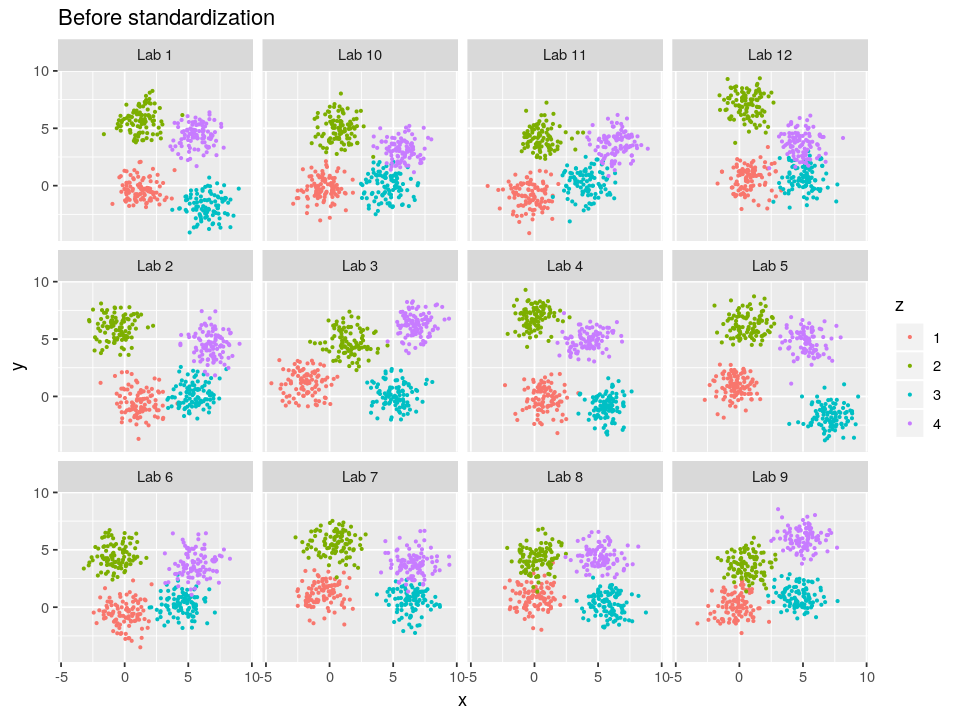

In [28]:
df     = as.data.frame(Y_small)
df$z   = as.character(dat[, "z"])
df$lab = paste("Lab", C_small)

options(repr.plot.height = 6, repr.plot.width = 8)
gp = ggplot(df, aes(x = x, y = y, color = z)) +
    geom_point(size = 0.5) +
    labs(title = "Before standardization") + 
    facet_wrap(~lab)
print(gp)

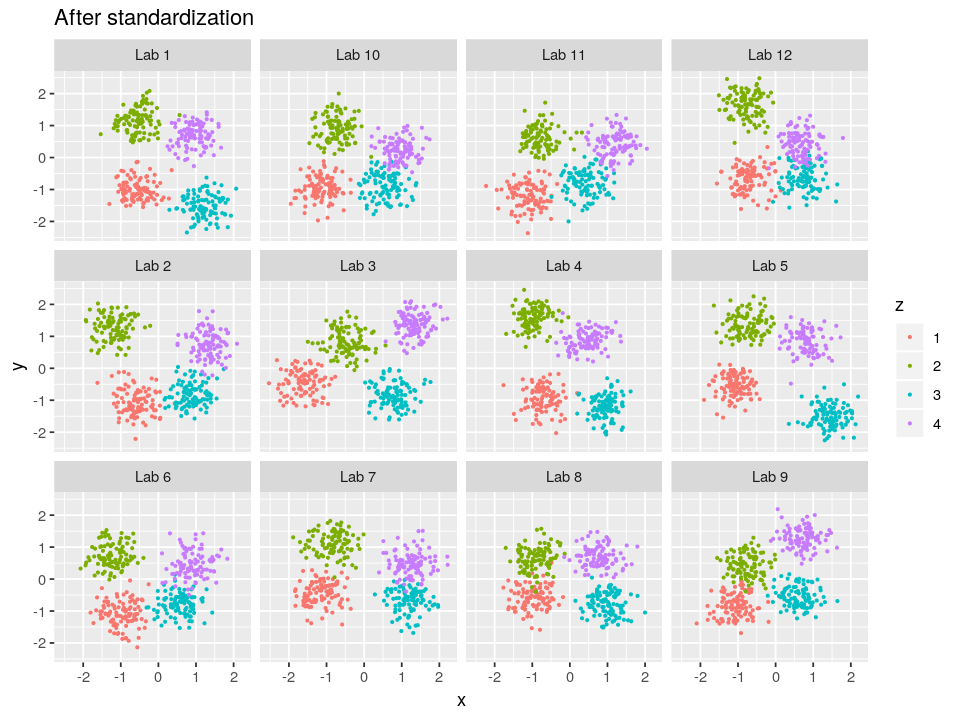

In [29]:
df     = as.data.frame(Y_small_scaled)
df$z   = as.character(dat[, "z"])
df$lab = paste("Lab", C_small)

options(repr.plot.height = 6, repr.plot.width = 8)
gp = ggplot(df, aes(x = x, y = y, color = z)) +
    geom_point(size = 0.5) +
    labs(title = "After standardization") + 
    facet_wrap(~lab)
print(gp)

run MPSK model

In [30]:
### run MPSK model
tt_start = Sys.time()
res      = mpsk(Y_small_scaled, C_small)
tt_stop  = Sys.time()

### store the results
out = list(
    time_start = tt_start,
    time_stop  = tt_stop,
    res        = res)

how long does it run?

In [35]:
difftime(out$time_stop, out$time_start)

Time difference of 2.661123 mins

check if all the functions works on the results

In [33]:
cat("Size of data:", nrow(out$res$data$Y), "\n")
res = out$res
cat("\n=== relabel ===\n")
resRelab      = relabelChain(res)
cat("\n=== calibrate ===\n")
resCalibrated = calibrate(resRelab)
cat("\n=== summarize chain ===\n")
chainSummary  = summarizeChain(resCalibrated)

Size of data: 4800 

=== relabel ===

=== calibrate ===

=== summarize chain ===


ERROR: Error in matrix(0, nrow = J, ncol = p * K): invalid 'ncol' value (too large or NA)
